<h1>Individual Planning Report</h1> <h3>- Group19_ds_project </p>
    Hiu Lam LIN</h3>

**<h4>(1) Data Description**</h4>

1. </p>

|   | observations |
| ----: | -----: | 
| players | 196  |
| sessions | 1535  |


2. 
**players**:
|   |  Mean |   Max  |   Min  |
| :---------------- | ----: | -----: | -----: |
| played_hours      | 5.846 | 223.100  | 0  |
| Age               | 21.14 | 58.00  | 9.00  |

Counts for remaining variables are the same (196)

[experience]
|  |  |
| :---------------- | ----: |
| Amateur      | 63 |
| Beginner      | 35 |
| Pro      | 14 |
| Regular      | 36 |
| Veteran      | 48 | 

[subscribe]
|  FALSE | TRUE |
| ----: | -----: | 
| 52 | 144  | 

**sessions**:
| Variables\Item      |  Mean     |
| :------------------ | --------: |
| original_start_time | 1.719e+12 |
| original_end_time   | 1.719e+12 |

Counts for remaining variables are the same (1535)

3.
|   | variables |
| ----: | -----: | 
| players | 7  |
| sessions | 5  |

4. 
players:
 | Names of variables    | Types of variables |
| :-------- | :------- |
| experience  | character    |
| subscribe |  logical     |
| hashedEmail    | character    |
| played_hours      | double |
| name              | character  |
| gender            | character  |
| Age               | double |

sessions:
 | Names of variables    | Types of variables |
| :-------- | :------- |
| hashedEmail      | character |
| started_time      | character |
| end_time      | character |
| original_start_time       | double  |
| original_end_time      | double |

5. 
</p>players:


 || |
| :-------- | :------- |
| experience  | players' experience levels in-game classified into levels: “Amateur”, “Beginner”, “Pro”, “Regular”, “Veteran”|
| subscribe |  whether players subscribe to a game-related newsletter, indicated with TRUE and FALSE     |
| hashedEmail    | players’ email address    |
| played_hours      | players’ total playing durations (in hours) |
| name              |players' names|
| gender            | players' gender |
| Age               | players' age|

sessions:
 |||
| :-------- | :------- |
| hashedEmail      | players’ email address |
| started_time      | start time of each play session in **date format** (dd/mm/yyyy & time) |
| end_time      | end time of each play session in **date format**|
| original_start_time       | start time of each play session in **seconds**  |
| original_end_time      | end time of each play session in **seconds** |

6. 
- The start time and end time in sessions.csv are in date format (chr), and there is no column for the total spending time of each session.
- Some variables are not useful for investigating the questions.
- “Age” & "original_end_time" includes “N/A”
- Experience (players.csv) for “Pro” & “Amateur” differences are large (14 & 63), which may make “Pro” underrepresent.
</p>
7.
- The information provided by players could be inaccurate. E.g. experience: bias could occur across players in determining their experience level, which makes the information not very accurate for comparison. 

8. 
- The research group records players' gameplay, speech, and key presses in the PLAICraft Minecraft browser window to collect the data.


In [111]:
library(tidyverse)
library(tidymodels)
library(repr)
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
head(players)
head(sessions)
nrow(players)
nrow(sessions)
summary(players)
summary(sessions)
players |> count(experience)
players |> count(Age)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 196

[1] 1535

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


Age,n
<dbl>,<int>
9,1
10,1
11,1
12,1
14,2
15,2
16,3
17,73
18,7


**<h4>(2) Questions**</h4>

<h5>Board Question Q(1)</h5>

- Specific: Does the amount of time of male [gender] player spends in the game [played_hours] predict whether they subscribe to a game-related newsletter [subscribe] in [players.csv] dataset?
- Response variable: [subscribe]
- Explanatory variable: [played_hours] 
- Subset of interest: Male players

The [players.csv] dataset includes[subscribe], [played_hours] and [gender], allows me:
- Explore whether more hours played correlate with subscription
- Only looking for data in a specific gender group (male)
- Prepare to use predictive method to find whether [subscribe] is predictable with [played_hours]

- Convert [subscribe] into factor type
- Filter for male players
- Select relevant columns: [subscribe] and [played_hours]

- KNN-Classification method


**<h4>(3) Exploratory Data Analysis and Visualization**</h4>

In [108]:
library(tidyverse)
library(tidymodels)
library(tibble)
library(repr)
# dataset loaded into R
players <- read_csv("players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<h5>Minimum Wrangle Data</h5>
No wrangling is required for players.csv as it satisfies the criteria of having a single observation in each row, a single variable in each column, and each value is a single cell. There are no "NA" values in both columns.

In [109]:
# mean of played_hours
mean_played_hours <- players |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE))

# mean of Age
mean_age <- players |>
  summarise(mean_age = mean(Age, na.rm = TRUE))

# mean values in a table format
summary_table <- tibble(mean_played_hours, mean_age)
summary_table

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


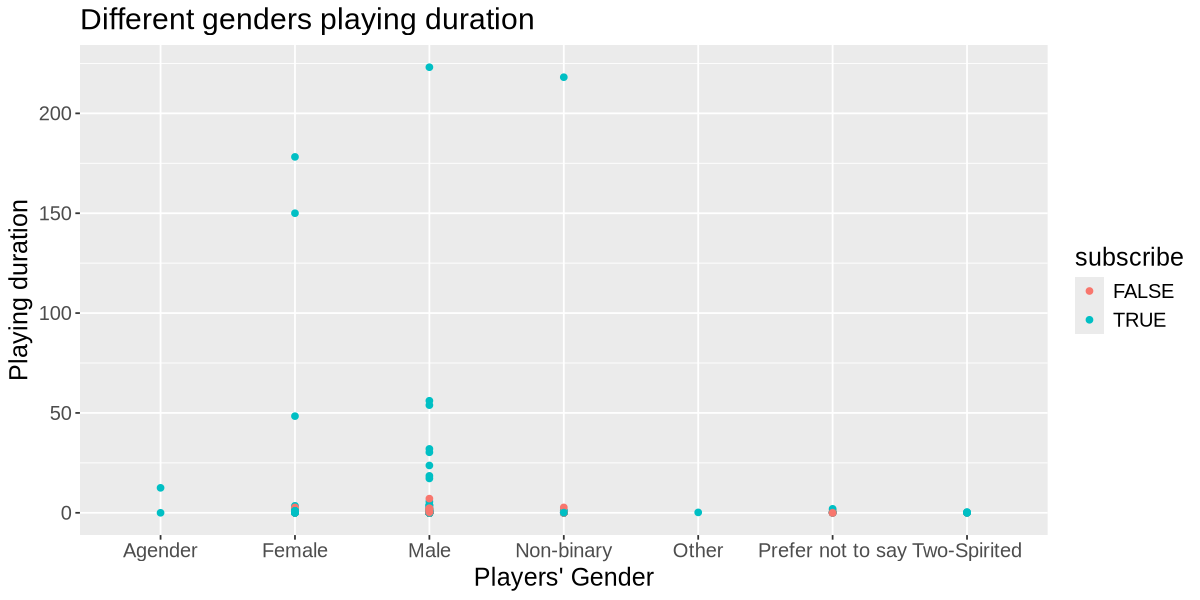

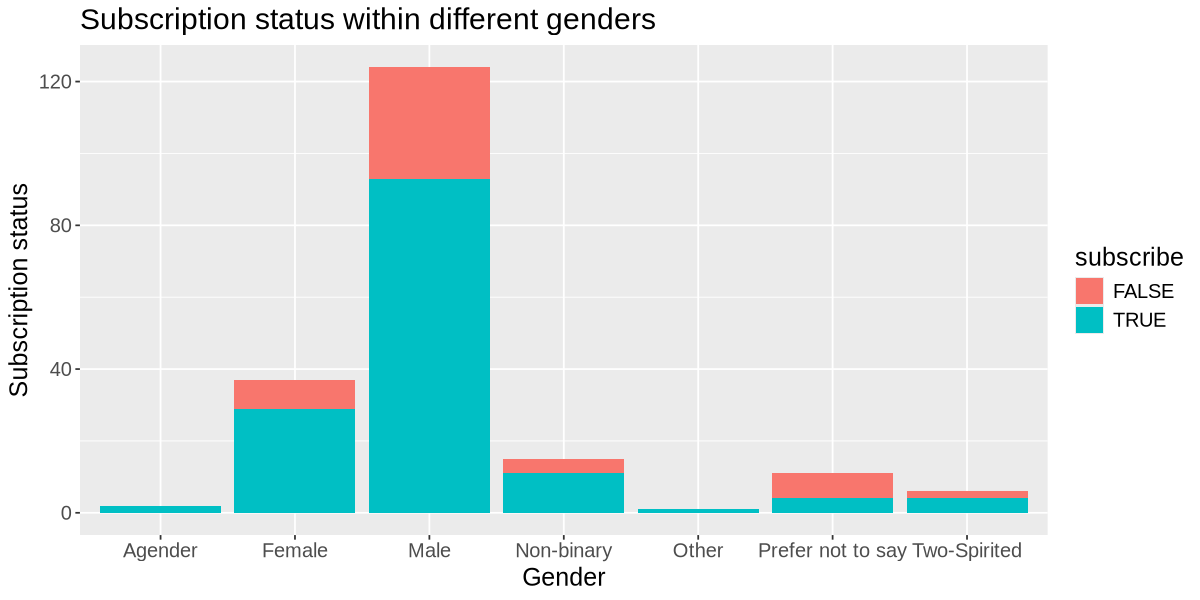

In [110]:
# create the visualization
options(repr.plot.width = 10, repr.plot.height = 5)
plot_1 <- ggplot(players, aes(x = gender, y = played_hours, color = subscribe)) +
  geom_point(stat = "identity") +
  labs(x = "Players' Gender", 
       y = "Playing duration (in hours)",
       title = "Different genders' playing duration") +
  theme(text = element_text(size = 15))
plot_1

plot_2 <- ggplot(players, aes(x = gender, fill = subscribe)) +
        geom_bar() +
        labs(x = "Gender",
             y = "Subscription status", 
             title = "Subscription status within different genders") +
        theme(text = element_text(size = 15))
plot_2

plot_1: Male players have a wider playing duration varities compare to the other genders, so choosing male players can provide larger varities in the prediction on subscription status with thier playing duration, and also seems like players do not subscribe tend to cluster towards lower duration, which might be a possible relationship addressing the question

plot_2: Male players dominate in volume and more male players subscribed than did not subscribed male players. It suggests male players are a large subgroup to study, but the subscription number isn't evely distribution which may affect the model predictions.

**<h4>(4) Methods and Plan**</h4>

<h5>KNN-Classification</h5>

- Response variable is logical value can be categorized and converted into factor type, the explanatory variable is numeric and continuous, which can work with the distance-based method in KNN to measure the distance between 2 observations.

<h5>Assumption</h5>

- Chosen metric is appropriate for the data and reflect the similarity between data points
- Predictors contribute equally in the distance calculation
- Dataset is large and representative enough

<h5>Limitations</h5>

- Becomes very slow if the training data gets larger
- May not perform well when classes are imbalanced

<h5>Selecting model</h5>

- Use cross-validation (5-fold) and tune the k parameter
- Find optimal number of neighbors and maximize the accuracy
- Use test set to do evaluation and check if there is overfitting or underfitting

<h5>Process Data</h5>

- Split the wrangled data by using a 70/30 train-test split before modelling
- Create model:
    - create recipe, scale and center [played_hours]
    - create knn model specification (model: "classification"; engine = "kknn")
    - combine with workflow
- Use cross-validation: use 5-fold cross-validation on the training set to tune k
- Get final workflow and fit on the training data
- Use the best model to evaluate on testing set to estimate accuracy